# Simulation Analysis 

## Experiment: Upset Probablity vs Escalating Sample Size
For the Maine Govenor's race study the effect of sample size on upset probability for an RCV election.
The winner was: Mills, Janet T.
In the final round of the election the ballots were:
    Cote, Adam Roland: 53866
    Mills, Janet T.: 63387

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
filename = "../data_generation/actual_10_5000.csv"
df = pd.read_csv(filename)
df.__delitem__('Unnamed: 0')

In [29]:
df[df["sample_size"] == 3000].upset_probability.describe()

count    1000.000000
mean        0.112592
std         0.153748
min         0.000000
25%         0.012000
50%         0.046000
75%         0.154000
max         0.904000
Name: upset_probability, dtype: float64

In [17]:
winner = 'B'
df['upset_probability'] = 1 - df[winner]

In [18]:
df.describe()

,A0,A1,A2,A3,A4,A5,A6,A7,B,C,sample_size,seed,time_delta,upset_probability
count,30000.000000,29999.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.000005,0.000003,0.000004,0.000006,0.000005,0.000006,0.000005,0.000004,0.886404,0.113558,1550.000000,500.500000,0.000522,0.113596
std,0.000164,0.000123,0.000192,0.000300,0.000314,0.000369,0.000168,0.000163,0.154480,0.154419,865.558571,288.679802,0.000290,0.154480
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006000,0.000000,100.000000,1.000000,0.000043,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.847000,0.011000,800.000000,250.750000,0.000291,0.011000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.951000,0.049000,1550.000000,500.500000,0.000516,0.049000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.989000,0.153000,2300.000000,750.250000,0.000731,0.153000
max,0.014000,0.013000,0.025000,0.042000,0.038000,0.058000,0.014000,0.021000,1.000000,0.994000,3000.000000,1000.000000,0.004123,0.994000


Text(0, 0.5, 'Sample Size')

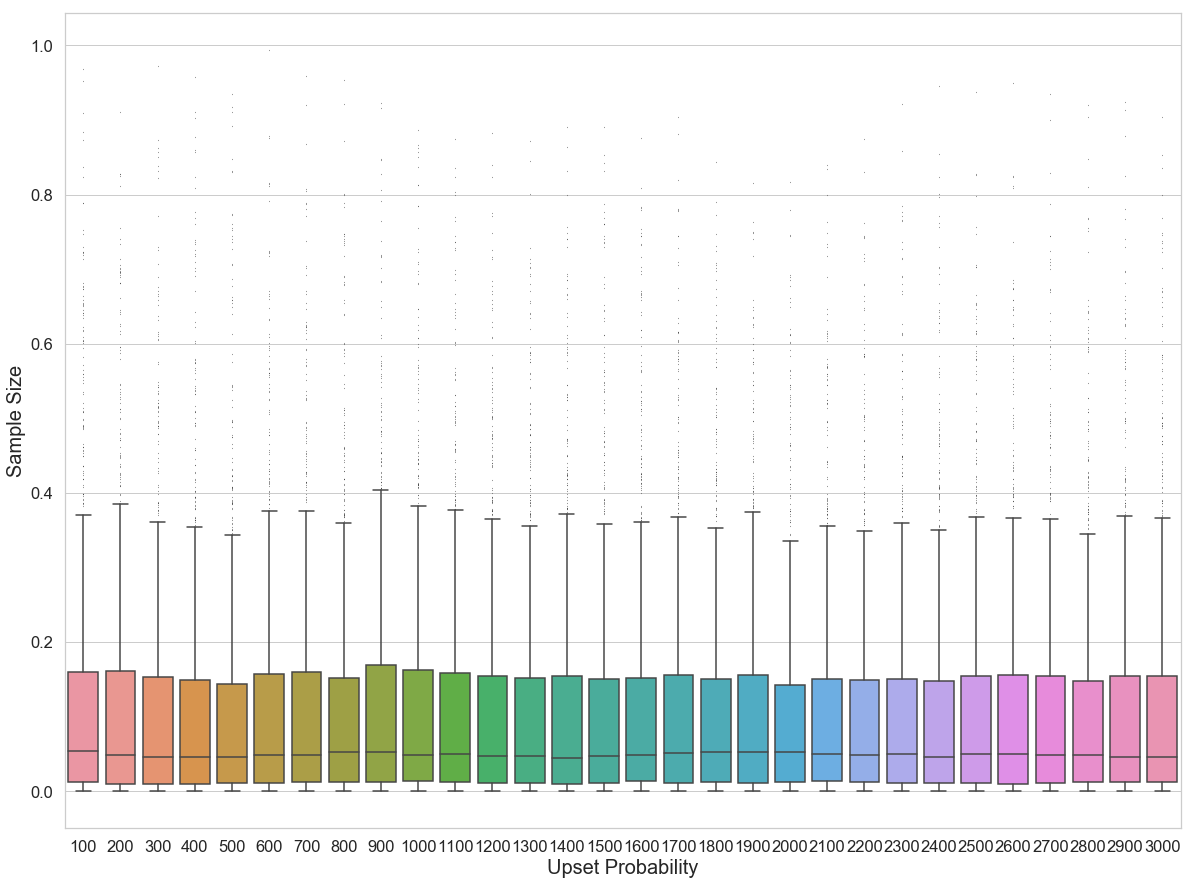

In [19]:
# Box plot as described: https://en.wikipedia.org/wiki/Box_plot 
sns.set(font_scale=1.5) 
plt.figure(figsize=(20, 15))
sns.set_style('whitegrid')
ax = sns.boxplot(x='sample_size',y='upset_probability', data=df,fliersize=1)
ax.set_xlabel("Upset Probability",fontsize=20)
ax.set_ylabel("Sample Size",fontsize=20)

In [11]:
sample_size_upset_df = df[df['sample_size']==100][['seed']]
for sample_size in df.sample_size.unique():
    sample_df = df[df['sample_size']==sample_size][['seed','upset_probability']]
    sample_df= sample_df.rename(index=str, columns={ 'upset_probability':"upset_probability_sample_%d"%sample_size})
    sample_size_upset_df = sample_size_upset_df.join(sample_df.set_index('seed'),on='seed')

In [12]:
sample_size_upset_df.describe()

,seed,upset_probability_sample_100,upset_probability_sample_200,upset_probability_sample_300,upset_probability_sample_400,upset_probability_sample_500,upset_probability_sample_600,upset_probability_sample_700,upset_probability_sample_800,upset_probability_sample_900,...,upset_probability_sample_2100,upset_probability_sample_2200,upset_probability_sample_2300,upset_probability_sample_2400,upset_probability_sample_2500,upset_probability_sample_2600,upset_probability_sample_2700,upset_probability_sample_2800,upset_probability_sample_2900,upset_probability_sample_3000
count,426.00000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,213.50000,0.878376,0.883333,0.884575,0.883455,0.882953,0.885758,0.884986,0.881188,0.882688,...,0.883923,0.884455,0.883972,0.884585,0.881085,0.882427,0.885059,0.886423,0.883709,0.882869
std,123.11986,0.174610,0.160089,0.160541,0.172183,0.166221,0.158354,0.156370,0.159280,0.153560,...,0.154672,0.155214,0.154709,0.155582,0.157013,0.155036,0.150775,0.154009,0.158425,0.159484
min,1.00000,0.080000,0.175000,0.028000,0.042000,0.065000,0.006000,0.041000,0.047000,0.077000,...,0.160000,0.126000,0.079000,0.055000,0.063000,0.050000,0.065000,0.080000,0.076000,0.096000
25%,107.25000,0.837250,0.834000,0.840500,0.858750,0.856250,0.846250,0.838000,0.847500,0.831750,...,0.846250,0.847250,0.840000,0.852000,0.843250,0.837250,0.837750,0.853750,0.845000,0.839000
50%,213.50000,0.954500,0.952000,0.956500,0.957500,0.952000,0.953500,0.950000,0.944000,0.943000,...,0.950500,0.951500,0.948000,0.948500,0.944500,0.946500,0.945000,0.949000,0.953000,0.953500
75%,319.75000,0.990000,0.992000,0.990000,0.992000,0.990000,0.989000,0.986750,0.986500,0.988000,...,0.986000,0.986000,0.988000,0.988000,0.987000,0.988000,0.988000,0.988000,0.986000,0.987000
max,426.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
